# Projeto 13: Compressão de imagens  

# Etapa 1: Importação das biblitoecas

In [1]:
#%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import pandas as pd
import seaborn as sns
import pickle
import zipfile
import random
tf.__version__

'2.7.0-dev20210724'

# Etapa 2: Carregamento da base de dados

In [3]:
path = "../content/traffic-signs-data.zip"
zip_object = zipfile.ZipFile(file=path, mode="r")
zip_object.extractall("../content/")
zip_object.close()

In [ ]:
with open("../content/traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("../content/traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("../content/traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [ ]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

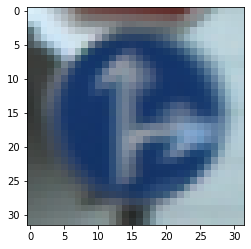

In [ ]:
plt.imshow(X_train[1105])

# Etapa 3: Visualização dos dados

In [ ]:
X_train.shape

(34799, 32, 32, 3)

In [ ]:
X_test.shape

(12630, 32, 32, 3)

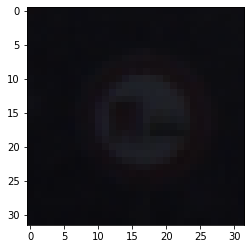

In [ ]:
i = random.randint(1,34000) 
plt.imshow( X_train[i] , cmap = 'gray')

In [ ]:
label = y_train[i]
label

10

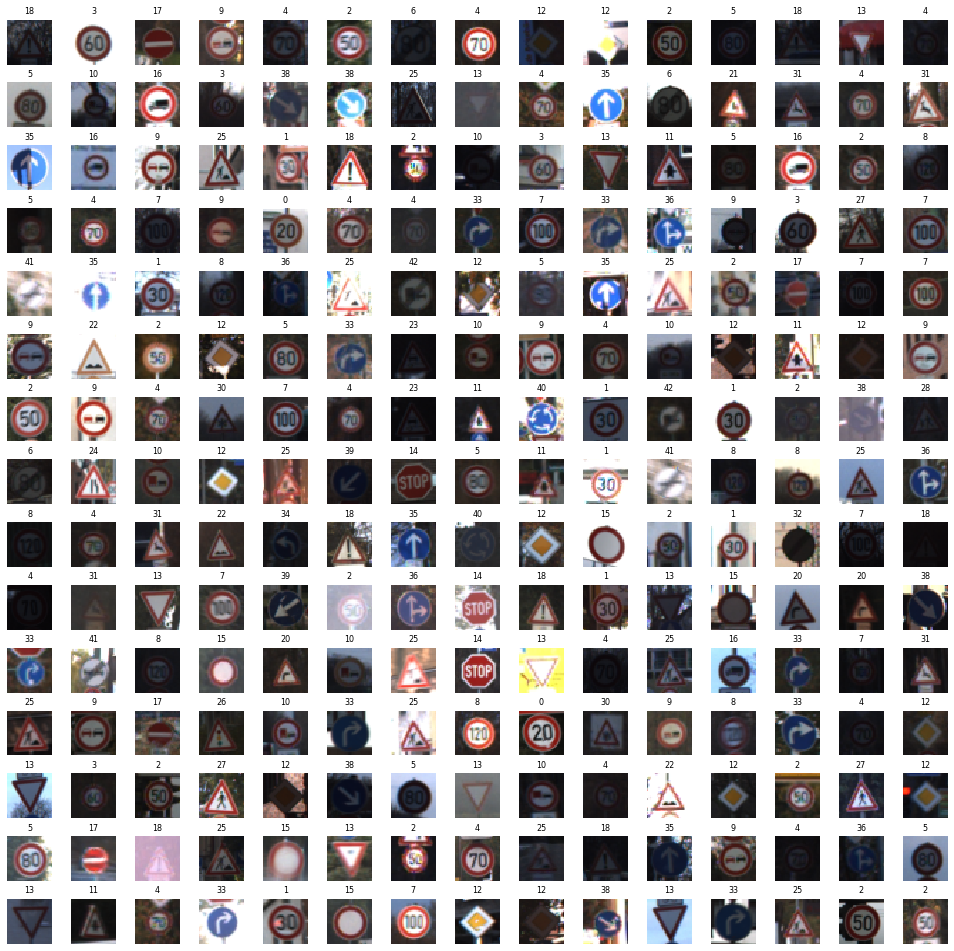

In [ ]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel()
n_training = len(X_train)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow( X_train[index] )
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

# Etapa 4: Pré-processamento

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

# Etapa 5: Criação e treinamento do autoencoder

In [ ]:
autoencoder = tf.keras.models.Sequential()

# Encoder
autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), strides=1, padding="same", input_shape=(32, 32, 3)))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same"))

autoencoder.add(tf.keras.layers.Conv2D(32, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same"))

autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))

# Encoded image (Code Layer)
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same")) 

# Decoder
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))

autoencoder.add(tf.keras.layers.Conv2D(32, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))

autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))

autoencoder.add(tf.keras.layers.Conv2D(3, (3,3), strides=1, activation='sigmoid', padding="same"))

In [ ]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.01))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 32)        0

In [ ]:
autoencoder.fit(X_train,          
          X_train, 
          epochs=20, 
          batch_size=200, 
          validation_data=(X_test, X_test))

Train on 34799 samples, validate on 12630 samples
Epoch 1/20
34799/34799 [==============================] - 14s 403us/sample - loss: 0.5040 - val_loss: 0.5073
Epoch 2/20
34799/34799 [==============================] - 5s 149us/sample - loss: 0.4853 - val_loss: 0.4854
Epoch 3/20
34799/34799 [==============================] - 5s 151us/sample - loss: 0.4810 - val_loss: 0.4799
Epoch 4/20
34799/34799 [==============================] - 5s 152us/sample - loss: 0.4779 - val_loss: 0.4783
Epoch 5/20
34799/34799 [==============================] - 5s 151us/sample - loss: 0.4759 - val_loss: 0.4740
Epoch 6/20
34799/34799 [==============================] - 5s 152us/sample - loss: 0.4753 - val_loss: 0.4851
Epoch 7/20
34799/34799 [==============================] - 5s 151us/sample - loss: 0.4732 - val_loss: 0.4721
Epoch 8/20
34799/34799 [==============================] - 5s 154us/sample - loss: 0.4723 - val_loss: 0.4719
Epoch 9/20
34799/34799 [==============================] - 5s 155us/sample - loss: 0.4

# Etapa 6: Avaliação do modelo

In [ ]:
predicted = autoencoder.predict(X_test[:10].reshape(-1, 32, 32, 3))

In [ ]:
predicted.shape

(10, 32, 32, 3)

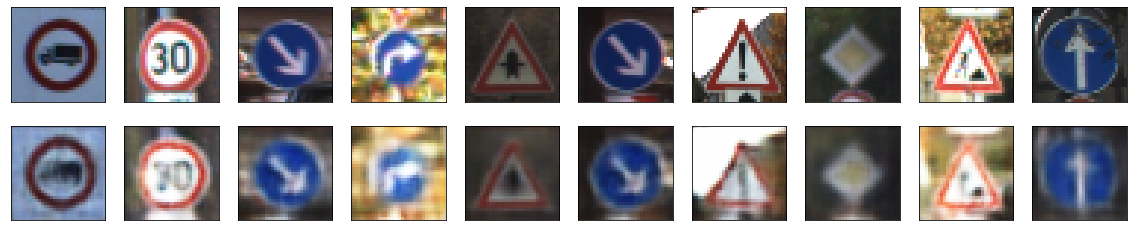

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([X_test[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((32, 32, 3)))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)